### Title: Data analysis for "August data" for bean lines (provided by Dr. Nicholas Larkan)

##### Datasheet used:"Faba_Seed_Analyzer_Data_August_2024.xlsx", sheet_name="Individual S2 Seed Data"  
##### Author: Harpreet Kaur Bargota
##### Email: harpreet.bargota@agr.gc.ca

In [33]:
#import the libraries required for analysis
import pandas as pd
import seaborn as sns
import cv2
import os
import matplotlib.pyplot as plt
from scipy.stats import (pearsonr, ttest_rel, f_oneway, spearmanr, shapiro, levene, wilcoxon, kruskal, skew, kurtosis )
import warnings
warnings.filterwarnings(action='ignore')

In [34]:
#Read the hand and machine measured data
Aug_data = pd.read_excel("../Groundtruth_data/Faba_Seed_Analyzer_Data_August_2024.xlsx", sheet_name="Individual S2 Seed Data")

In [35]:
#check the dataset
print (Aug_data.head(2))

        ID  Length(mm)  Width(mm)   Area(mm²)  Area(pix)      NC_1  \
0      NaN         NaN        NaN         NaN        NaN       NaN   
1  Vf1-1-2    21.09744  14.532204  241.729082    34121.0  1.592133   

   Circularity  L/W Ratio  Unnamed: 8               Length(mm).1  Width(mm).1  \
0          NaN        NaN         NaN  By Hand Measurements (mm)          NaN   
1      1.17374   1.451772         NaN                         20         14.0   

   Unnamed: 11             Length(mm).2 Width(mm).2  Unnamed: 14 Unnamed: 15  \
0          NaN  By Digital Measure (mm)         NaN          NaN         NaN   
1          NaN                    19.23       13.07          NaN         NaN   

   Unnamed: 16                                        Unnamed: 17 Unnamed: 18  
0          NaN  *measured by estimating the widest point with ...         NaN  
1          NaN  *are the same seeds that were photographed, bu...         NaN  


In [36]:
Aug_data.columns

Index(['ID', 'Length(mm)', 'Width(mm)', 'Area(mm²)', 'Area(pix)', 'NC_1',
       'Circularity', 'L/W Ratio', 'Unnamed: 8', 'Length(mm).1', 'Width(mm).1',
       'Unnamed: 11', 'Length(mm).2', 'Width(mm).2', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

In [37]:
Aug1=Aug_data.copy()

In [38]:
Aug1.columns

Index(['ID', 'Length(mm)', 'Width(mm)', 'Area(mm²)', 'Area(pix)', 'NC_1',
       'Circularity', 'L/W Ratio', 'Unnamed: 8', 'Length(mm).1', 'Width(mm).1',
       'Unnamed: 11', 'Length(mm).2', 'Width(mm).2', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

### Machine measured data

In [39]:
MM=Aug1[1:].iloc[:,[0,1]].reset_index(drop=True).rename(columns={'Length(mm)': 'MM_Length'}).set_index('ID')
MM

,MM_Length
ID,
Vf1-1-2,21.097440
Vf1-1-2,19.485046
Vf1-1-2,19.970481
Vf1-1-2,17.850534
Vf4-1-1,7.801351
...,...
Vf224-3-2,17.345747
Vf224-3-2,16.721651
Vf224-3-2,16.421493


In [40]:
missing_values_MM = MM['MM_Length'].isna().groupby(MM.index).sum()
missing_values_MM

ID
VF120-1-2    0
VF456-1-1    0
VF527-1-1    0
Vf1-1-2      0
Vf100-1-2    0
            ..
Vf95-1-2     0
Vf96-1-2     0
Vf97-1-2     0
Vf98-1-2     0
Vf99-4-1     0
Name: MM_Length, Length: 531, dtype: int64

In [41]:
MM_count=MM.index.value_counts()
MM_count=pd.DataFrame(MM_count).rename(columns={'count':'Total No. of seeds'})

MM_count

,Total No. of seeds
ID,
Vf196-1-2,11
Vf127-1-2,11
Vf402-3-1,10
Vf7-1-1,10
Vf188-1-3,10
...,...
Vf578-2-1,2
Vf62-1-1,1
Vf481-3-1,1


### Digital-caliper measured data:

In [42]:

DCM=Aug_data.iloc[1:,[0,12]].reset_index(drop=True).rename(columns={'Unnamed: 0': 'ID','Length(mm).2': 'DCM_Length'}).set_index('ID')
DCM.head(5)

,DCM_Length
ID,
Vf1-1-2,19.23
Vf1-1-2,20.06
Vf1-1-2,20.41
Vf1-1-2,17.59
Vf4-1-1,NaN


In [43]:
missing_values_DCM = DCM['DCM_Length'].isna().groupby(DCM.index).sum()
missing_values_DCM = pd.DataFrame(missing_values_DCM).rename(columns={'DCM_Length': 'No. of missing seeds data'})
missing_values_DCM.head(5)

,No. of missing seeds data
ID,
VF120-1-2,6
VF456-1-1,10
VF527-1-1,6
Vf1-1-2,0
Vf100-1-2,10


In [44]:

# DCM=Aug_data.iloc[1:,[0,12]].reset_index(drop=True).rename(columns={'Unnamed: 0': 'ID','Length(mm).1': 'DCM_Length'}).set_index('ID')
# DCM.head(5)

In [45]:
# missing_values_DCM = DCM['DCM_Length'].isna().groupby(DCM.index).sum()
# missing_values_DCM = pd.DataFrame(missing_values_DCM).rename(columns={'DCM_Length': 'No. of missing seeds data'})
# missing_values_DCM.head(5)

In [46]:
df_t=pd.concat([missing_values_DCM, MM_count], axis=1)
df_t

,No. of missing seeds data,Total No. of seeds
ID,,
VF120-1-2,6,10
VF456-1-1,10,10
VF527-1-1,6,10
Vf1-1-2,0,4
Vf100-1-2,10,10
...,...,...
Vf95-1-2,6,6
Vf96-1-2,10,10
Vf97-1-2,6,6


In [47]:
df_t.index

Index(['VF120-1-2', 'VF456-1-1', 'VF527-1-1', 'Vf1-1-2', 'Vf100-1-2',
       'Vf101-1-3', 'Vf102-1-3', 'Vf103-1-2', 'Vf104-1-2', 'Vf106-1-2',
       ...
       'Vf89-1-1', 'Vf9-1-1', 'Vf90-1-1', 'Vf91-1-1', 'Vf94-1-2', 'Vf95-1-2',
       'Vf96-1-2', 'Vf97-1-2', 'Vf98-1-2', 'Vf99-4-1'],
      dtype='object', name='ID', length=531)

In [48]:
df_t1 = df_t.sort_index(ascending=False)
df_t1.tail(10)

,No. of missing seeds data,Total No. of seeds
ID,,
Vf106-1-2,0,4
Vf104-1-2,0,7
Vf103-1-2,1,10
Vf102-1-3,10,10
Vf101-1-3,10,10
Vf100-1-2,10,10
Vf1-1-2,0,4
VF527-1-1,6,10
VF456-1-1,10,10


In [49]:
df_t.index

Index(['VF120-1-2', 'VF456-1-1', 'VF527-1-1', 'Vf1-1-2', 'Vf100-1-2',
       'Vf101-1-3', 'Vf102-1-3', 'Vf103-1-2', 'Vf104-1-2', 'Vf106-1-2',
       ...
       'Vf89-1-1', 'Vf9-1-1', 'Vf90-1-1', 'Vf91-1-1', 'Vf94-1-2', 'Vf95-1-2',
       'Vf96-1-2', 'Vf97-1-2', 'Vf98-1-2', 'Vf99-4-1'],
      dtype='object', name='ID', length=531)

In [50]:
def extract_numeric(id_str):
    return int(id_str.split('-')[0][2:])

In [51]:
df_t_sorted=df_t.iloc[df_t.index.to_series().apply(extract_numeric).argsort()]


In [52]:
df_t_sorted

,No. of missing seeds data,Total No. of seeds
ID,,
Vf1-1-2,0,4
Vf2-1-1,5,5
Vf4-1-1,6,6
Vf6-1-2,10,10
Vf7-1-1,10,10
...,...,...
Vf638-1-1,10,10
Vf639-1-1,10,10
Vf640-3-1,10,10


In [53]:
df_t_sorted['No. of seeds by digital caliper'] = df_t_sorted['Total No. of seeds']-df_t_sorted['No. of missing seeds data']
df_t_sorted

,No. of missing seeds data,Total No. of seeds,No. of seeds by digital caliper
ID,,,
Vf1-1-2,0,4,4
Vf2-1-1,5,5,0
Vf4-1-1,6,6,0
Vf6-1-2,10,10,0
Vf7-1-1,10,10,0
...,...,...,...
Vf638-1-1,10,10,0
Vf639-1-1,10,10,0
Vf640-3-1,10,10,0


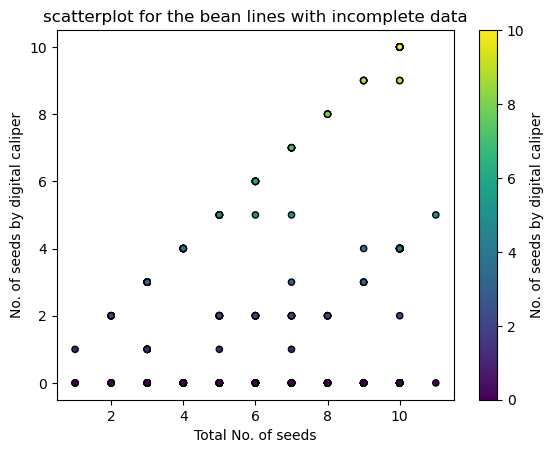

In [54]:
ax = df_t_sorted.plot.scatter(x='Total No. of seeds', y='No. of seeds by digital caliper', c='No. of seeds by digital caliper', colormap='viridis', edgecolor='black')
plt.title("scatterplot for the bean lines with incomplete data")
plt.show()
folder_path = "C:/Users/bargotah/Downloads/Python Scripts/"
file_name = 'No_digitaldata_png'
# plt.savefig(folder_path + file_name)

### Count of total number of bean lines

In [55]:
#total number of bean lines
len(df_t_sorted)
print ("Total number of bean lines are: ",len(df_t_sorted))

Total number of bean lines are:  531


In [56]:
#No digital caliper data
count_no_data = (df_t_sorted['No. of seeds by digital caliper'] == 0).sum()
print ("Number of bean lines that have no data for digital caliper are: ",count_no_data)

Number of bean lines that have no data for digital caliper are:  320


In [57]:
#digital caliper data
count_digital_data = (df_t_sorted['No. of seeds by digital caliper'] != 0).sum()
print ("Number of bean lines that have data for digital caliper are: ", count_digital_data)

Number of bean lines that have data for digital caliper are:  211


In [58]:
#complete data
count_complete_data = (df_t_sorted['No. of missing seeds data'] == 0).sum()
print ("Number of bean lines that have complete data for digital caliper are: ", count_complete_data)

Number of bean lines that have complete data for digital caliper are:  103


In [59]:
#incomplete data
count_incomplete_data = count_digital_data-count_complete_data
count_incomplete_data
print ("Number of bean lines that have incomplete data for digital caliper are:  ",count_incomplete_data)

Number of bean lines that have incomplete data for digital caliper are:   108


In [60]:
df_no_digitaldata = df_t_sorted[df_t_sorted['No. of seeds by digital caliper'] == 0]
df_no_digitaldata 

,No. of missing seeds data,Total No. of seeds,No. of seeds by digital caliper
ID,,,
Vf2-1-1,5,5,0
Vf4-1-1,6,6,0
Vf6-1-2,10,10,0
Vf7-1-1,10,10,0
Vf12-1-2,10,10,0
...,...,...,...
Vf638-1-1,10,10,0
Vf639-1-1,10,10,0
Vf640-3-1,10,10,0


array([[<Axes: title={'center': 'No. of missing seeds data'}>,
        <Axes: title={'center': 'Total No. of seeds'}>],
       [<Axes: title={'center': 'No. of seeds by digital caliper'}>,
        <Axes: >]], dtype=object)

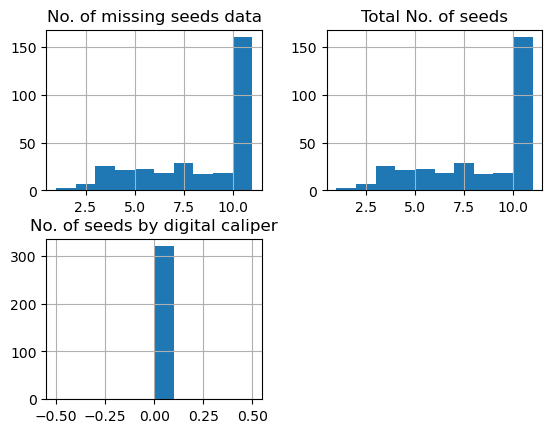

In [61]:
df_no_digitaldata.hist()